In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
from random import random
#from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.preprocessing import PolynomialFeatures

<h2>Polynomial Regression </h2>

In statistics , polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n^{th}$ degree polynomial in $x$.In Machine learning the polynomial regression is just the extended Linear Regression.This extension we achieve by the tranform the dataset as will shown below. 

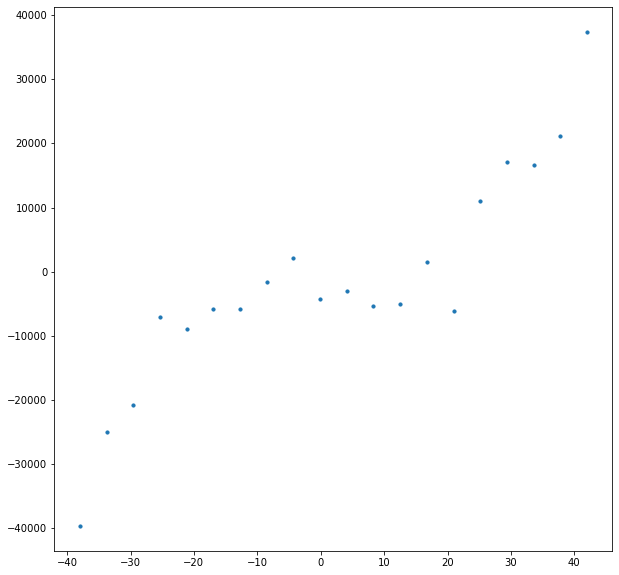

In [265]:
#plt.rcParams["figure.figsize"] = (5,5)
np.random.seed(0)
x = 2 - np.linspace(-10,10,num=20) *4    #np.linspace(-10,10,num=10)  
y = x - 2 * (x ** 2) + 0.5 * (x ** 3)  +100*np.random.normal(-50, 50, size=x.size)  
x = x[:, np.newaxis]
y = y[:, np.newaxis]
plt.scatter(x,y, s=10)
plt.show()

In [266]:
model =  LinearRegression()
z = model.fit(x,y)
y_pred = model.predict(x)

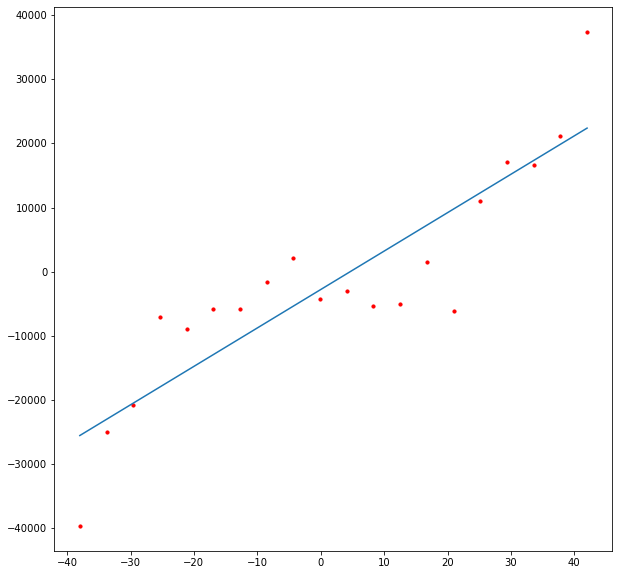

In [267]:
plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')

We can see that the straight line is unable to capture the patterns in the data. This is an example of <mark>under-fitting</mark> or <mark>High-Bias</mark>.  Computing the RMSE and R²-score of the linear line gives :

In [253]:
model.score(x,y)

0.7767230510045652

Using the straight line model we achieve $R^2 = 77$% accuracy.To reach a more accurately result we can improve the model by increasing the complexity using higher order equation.We can add powers of of the original features as new features.



The linear model $$Y = \omega_0  + \omega_1x$$ can be tranformed to 
$$Y = \omega_0  + \omega_1 x^1 + \omega_1 x^2$$ or to
$$Y = \omega_0  + \omega_1 x^1 + ... + \omega_p x^p$$ polynomial.

We can add new features to the dataset, which are just the  $𝑛_{𝑡ℎ}$  degree polynomial in existing ones.
$$X = \begin{bmatrix} 
 x_1 \\
\vdots   \\
 x_n \\
\end{bmatrix} -- >  
X_{polyData} = T(X) = \begin{bmatrix} 
1 &x_1 & x_1^2 & \dots & x_1^p \\
\vdots & \ddots &  \ddots & \vdots & \vdots \\
1& x_n & x_n^2  & \dots & x_n^p \\
\end{bmatrix} $$

The new Dataset 𝑇(𝑋) can be trained in Multiple Linear regression and the weights we achieve will correspond to in $w_p $ in $Y = \omega_0  + \omega_1 x^1 + ... + \omega_p x^p$

To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by <mark>scikit-learn</mark>.


In [254]:
polynomial_features= PolynomialFeatures(degree=2)


Example of tranformation of dataset 

In [255]:
polynomial_features.fit_transform(np.array([[1],[2],[3]]))

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

 $$X = \begin{bmatrix} 
 1 \\
 2   \\
 3 \\
\end{bmatrix} -- >  
X_{polyData} = T(X) = \begin{bmatrix} 
1 & 1 & 1   \\
2 & 2 &  4 \\
1& 3 & 9 \\
\end{bmatrix} $$ T(X) 2 degree

Let's returned back to out dataset 

We see that if we using linear eqaution the result is underfitting,Let's compare the 1,2,3 degree polynomial.

In [256]:
scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [274]:
def poly_regression(degree,x):
    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = scaler.fit_transform(x)
    x_poly = polynomial_features.fit_transform(x_poly)
    model =  LinearRegression()
    model.fit(x_poly,y ) 
    y_pred,model.predict(x_poly)
    return model,y_pred,model.score(x_poly,y)

1


TypeError: unsupported format string passed to LinearRegression.__format__

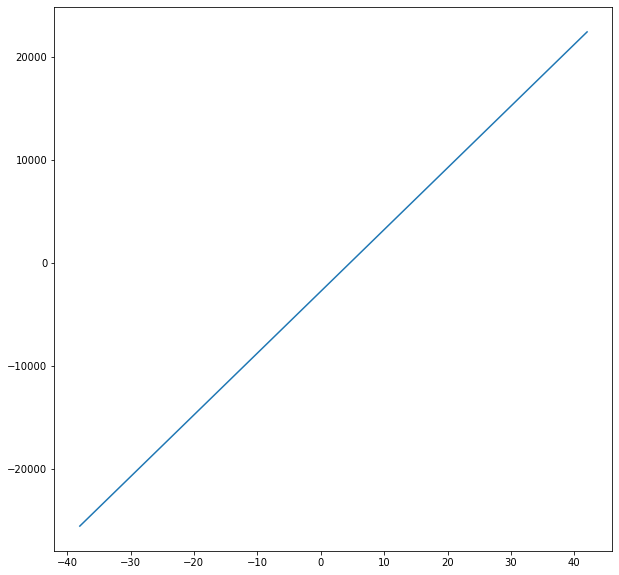

In [282]:
#fig, axs = plt.subplots(size, size,figsize=(25,25)) 
plt.rcParams["figure.figsize"] = (10,10)
for i in 1,2,3:
    plt.figsize=(50,50)
    print(i)
    linear_model,y_pred,score =  poly_regression(i,x)
    plt.plot(x, y_pred)
    plt.plot(x, y_pred,label="$n^{}$,score={:.2f}".format(i,scor))  #L = 0.0028
    plt.scatter(x,y, s=10,color='r',label="data set")
    #plt.legend()
plt.show()    

From the above graphic we see that the Polynomial $n^3$ is the best with an accuracy 0.93 and the green line fit data very well and red and blue we can conclude they underfit the data.

In [264]:
plt.rcParams["figure.figsize"] = (10,10)
for i in 1,3,25:
    plt.figsize=(50,50)
    y_pred,scor = poly_regression(i,x)
    plt.plot(x, y_pred,label="$degree={}$,score={:.2f}".format(i,scor))  #L = 0.0028
    plt.scatter(x,y, s=10,color='r',label="data set")
    plt.legend()
plt.show()    

TypeError: unsupported format string passed to LinearRegression.__format__

For degree=25 the model fits training data too much well 100% accuracy that is the very bad sign.In general this means the biases or  noise is captured too, that is called <mark>over-fitting</mark> or <mark>Low-Bias and high -variance</mark> .This is also mean that the model will fail for new unseen data.

<h2>Bias and Variance</h2>

Bias refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.<br> <br>
Variance refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.


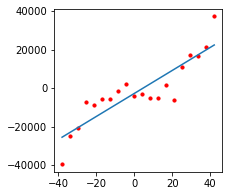

In [50]:
plt.rcParams["figure.figsize"] = (3,3)
y_pred,scor = poly_regression(1)
plt.plot(x, y_pred,label="$degree={}$,score={:.2f}".format(i,scor))
plt.scatter(x,y, s=10,color='r',label="data set")

In case when degree=1 it called has high Bias and low variance or Underfit.

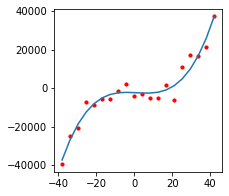

In [51]:
plt.rcParams["figure.figsize"] = (3,3)
y_pred,scor = poly_regression(3)
plt.plot(x, y_pred,label="$degree={}$,score={:.2f}".format(i,scor))
plt.scatter(x,y, s=10,color='r',label="data set")

In case when degree=3 that is correct fit,that has low bais and low variance.

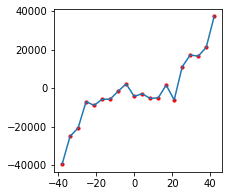

In [241]:
plt.rcParams["figure.figsize"] = (3,3)
linear_model = poly_regression(1)
plt.plot(x, y_pred,label="$degree={}$,score={:.2f}".format(i,scor))
plt.scatter(x,y, s=10,color='r',label="data set")

In case when degree=25 that is overfit,that has low bais and high variance.

Ideally, a machine learning model should have low variance and low bias.Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made.

<img src='https://randlow.github.io/images/ml/tradeoff_cost_bias.png' alt="Italian Trulli">

<h2> Lasso Regression </h2>

In [243]:
linear_model = poly_regression(10)
y_predi = linear_model.predict(x_poly)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 11 is different from 26)

In [150]:
lasso_model =  Lasso(alpha=0)
lasso_model.fit(x_poly,y ) 
y_pred_lasso = lasso_model.predict(x_poly)

<ipython-input-150-4af958b5866e>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(x_poly,y )
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85877414.1451883, tolerance: 544296.3676112347
  model = cd_fast.enet_coordinate_descent(


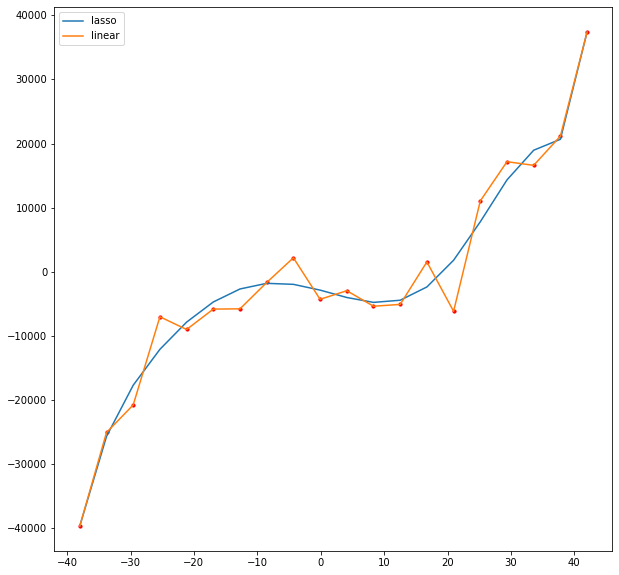

In [148]:
#plt.plot(x, y_pred)  #L = 0.0028
plt.scatter(x,y, s=10,color='r')
plt.plot(x, y_pred_lasso,label='lasso')
plt.plot(x, y_pred,label = 'linear')
plt.legend()

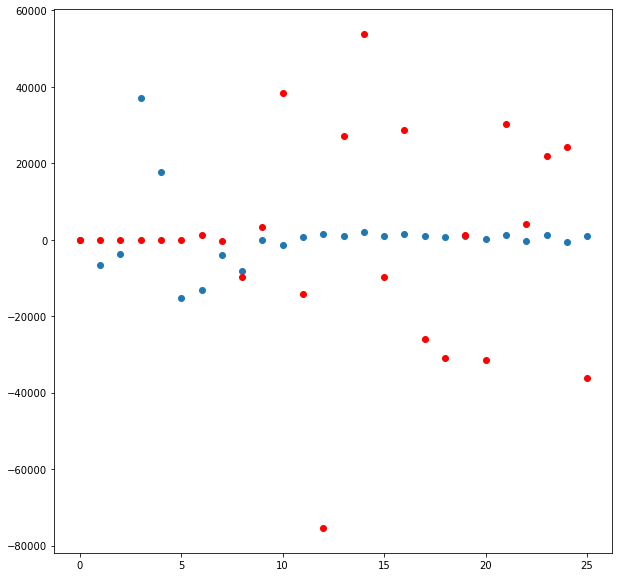

In [217]:
lasso_model.coef_
plt.scatter(np.linspace(start=0,stop=25,num=len(lasso_model.coef_) ),lasso_model.coef_)
#plt.plot(np.linspace(start=0,stop=25,num=len(linear_model.coef_) ),(linear_model.coef_)/10**10,color='r')
plt.scatter(np.linspace(start=0,stop=25,num=linear_model.coef_.size ),(linear_model.coef_)/10**5,color='r')

In [214]:
key = []
for i in range(26):
    key.append('w_'+str(i))
key    

['w_0',
 'w_1',
 'w_2',
 'w_3',
 'w_4',
 'w_5',
 'w_6',
 'w_7',
 'w_8',
 'w_9',
 'w_10',
 'w_11',
 'w_12',
 'w_13',
 'w_14',
 'w_15',
 'w_16',
 'w_17',
 'w_18',
 'w_19',
 'w_20',
 'w_21',
 'w_22',
 'w_23',
 'w_24',
 'w_25']

In [231]:
linear_model.coef_.size
len(key)
linear_model.coef_/10**8

array([[ 1.77619536e-07, -1.74185495e-04,  1.98639996e-03,
         1.99478859e-03, -8.59427585e-02,  9.21254712e-03,
         1.32373206e+00, -3.65317451e-01, -9.84706443e+00,
         3.35654455e+00,  3.83839913e+01, -1.42872856e+01,
        -7.54432935e+01,  2.71169869e+01,  5.38496004e+01,
        -9.78775583e+00,  2.87672891e+01, -2.60992643e+01,
        -3.09142984e+01,  1.31355666e+00, -3.14751757e+01,
         3.02516963e+01,  3.99104170e+00,  2.19739914e+01,
         2.42276585e+01, -3.62637060e+01]])

<BarContainer object of 26 artists>

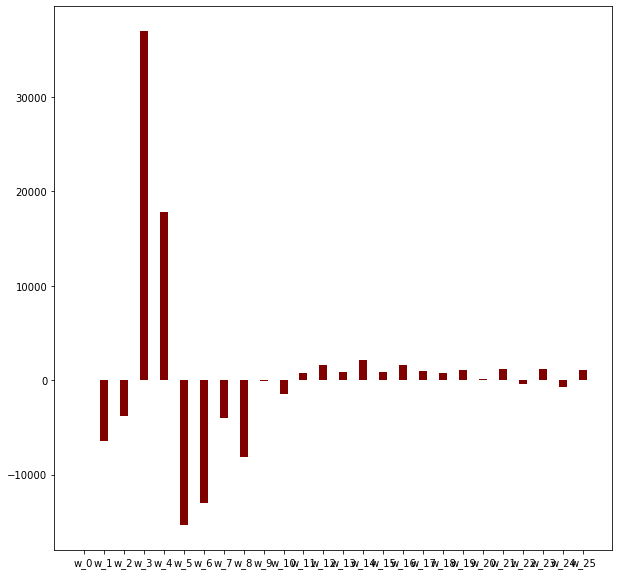

In [235]:
plt.bar(key , lasso_model.coef_, color ='maroon',width = 0.4)
#plt.bar(key , linear_model.coef_/10**10, color ='red')
  

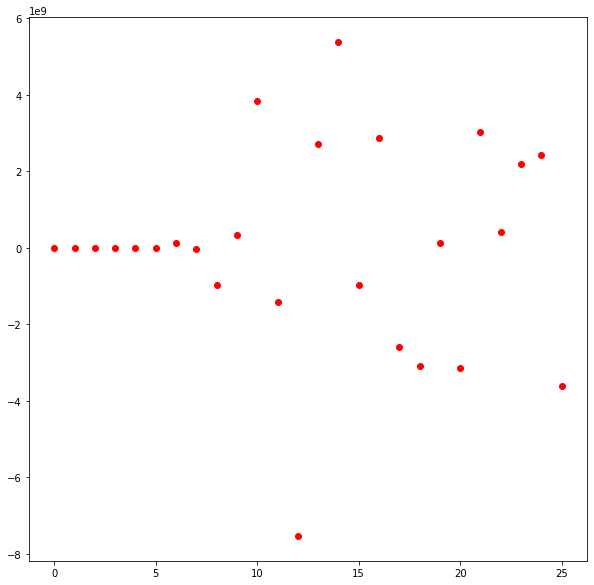

In [189]:
linear_model.coef_.size
lasso_model.coef_.size

26

In [120]:
model =  Ridge(alpha=30)
model.fit(x_poly,y ) 
y_pred_ridge = model.predict(x_poly)

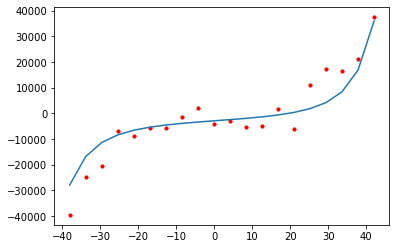

In [121]:
plt.scatter(x,y, s=10,color='r')
plt.plot(x, y_pred_ridge)


In [135]:
#pd.DataFrame(np.cov(x_poly))
covMatrix = np.cov(x_poly)
import seaborn as sn
plt.rcParams["figure.figsize"] = (10,10)
sn.heatmap(covMatrix)
sn.heatmap(np.corrcoef(x_poly))